# K-means Clustering 실습
* 비만도 데이터 – 직접 실습
* bmi.csv 데이터 파일 사용
    * 상위 데이터 100개중 height와 weight를 사용해서 분류
    * 아래 내용중에서 cluster_id는 분류된 cluster 값이다

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from library.kmeans import plot_elbow

In [3]:
bmi = pd.read_csv('./data/bmi.csv')
bmi

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [4]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  20000 non-null  int64 
 1   weight  20000 non-null  int64 
 2   label   20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [5]:
bmi.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
height,20000.0,NaN,NaN,NaN,159.9272,23.342096,120.0,140.0,160.0,180.0,200.0
weight,20000.0,NaN,NaN,NaN,57.535,13.285259,35.0,46.0,58.0,69.0,80.0
label,20000,3,fat,7322,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bmi = bmi[:100]
bmi

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
95,136,51,fat
96,131,37,normal
97,180,75,normal
98,191,60,thin


In [16]:
X_data = bmi.iloc[:, :-1]
y_data = bmi.iloc[:, -1]

## 데이터 시각화

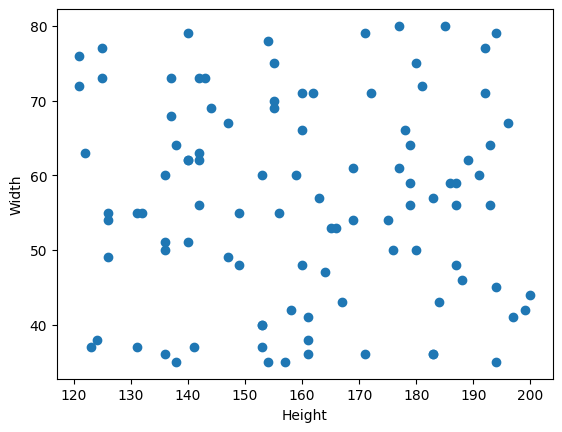

In [10]:
plt.scatter(data=bmi, x='height', y='weight')
plt.xlabel("Height")
plt.ylabel("Width")
plt.show()

C:\Users\medici\miniconda3\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


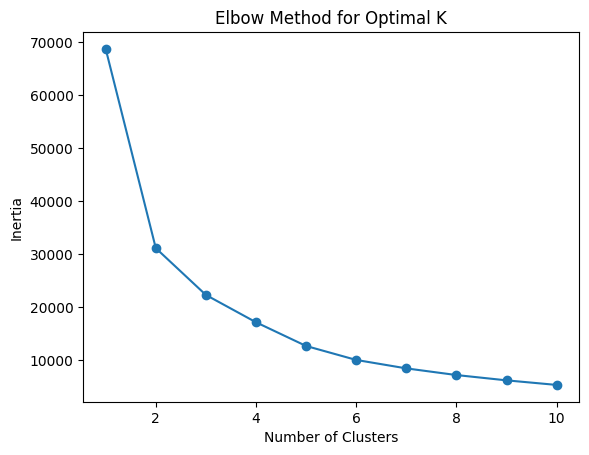

In [17]:
plot_elbow(X_data)

## KMeans 학습

In [19]:
model = KMeans(n_clusters=3, init="k-means++") # 모형 생성. 클러스터 = 3
model.fit(X_data)
model.cluster_centers_ # 각 클러스터의 중심값

array([[156.75862069,  47.51724138],
       [136.29411765,  62.23529412],
       [185.13513514,  58.40540541]])

In [21]:
pred = model.predict(X_data) # 데이터가 속하는 클러스터 예측
pred

array([1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1])

In [29]:
bmi.loc[:, 'pred'] = pred
bmi

C:\Users\medici\miniconda3\envs\deeplearning\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,height,weight,label,pred
0,142,62,fat,1
1,142,73,fat,1
2,177,61,normal,2
3,187,48,thin,2
4,153,60,fat,0
...,...,...,...,...
95,136,51,fat,1
96,131,37,normal,1
97,180,75,normal,2
98,191,60,thin,2


In [ ]:
plt.scatter(data=bmi, x='height', y='weight', c='pred')
plt.xlabel("Height")
plt.ylabel("Width")
plt.show()